In [6]:
import pandas as pd
thietbi= pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')


In [7]:
thietbi.rename(columns={'Retail Branding': 'Branding',
'Marketing Name': 'MarketingName'}, inplace=True)

In [8]:
dfketQua= pd.merge(nguoidung_sudung,
nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')
dfketQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [9]:
# hoặc left join
dfKetQua = pd.merge(nguoidung_sudung,
nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id', how='left')
dfketQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [10]:
# left-join dfketQua
dfKetQua=pd.merge(dfKetQua,thietbi[['Branding', 'Model']],left_on='device',right_on='Model',how='left')
dfKetQua

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F
...,...,...,...,...,...,...,...,...
287,260.66,68.44,896.96,25008,NaN,NaN,NaN,NaN
288,97.12,36.50,2815.00,25040,NaN,NaN,NaN,NaN
289,355.93,12.37,6828.09,25046,NaN,NaN,NaN,NaN
290,632.06,120.46,1453.16,25058,NaN,NaN,NaN,NaN


In [12]:
dfketQua[dfketQua.device.str.startswith('GT')].head (5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
9,69.80,14.70,25955.55,22801,android,GT-I9505
11,189.10,24.08,519.12,22805,android,GT-I9195
26,85.97,26.94,407.01,22831,android,GT-I8190N
45,29.54,34.78,33.79,22871,android,GT-I9300


In [13]:
dfKetQua.groupby('Branding').agg({
'outgoing_mins_per_month': 'mean', 'outgoing_sms_per_month': 'mean', 'monthly_mb':'mean',
'use_id': 'count'})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


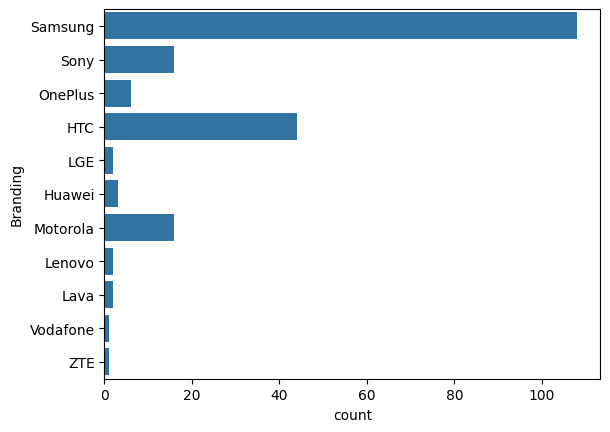

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot (y='Branding',data=dfKetQua)
plt.show()

C:\Users\thegi\AppData\Local\Temp\ipykernel_23820\1159291218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='outgoing_mins_per_month',y='Branding',data=dfKetQua,errorbar=None, palette='pastel')


<Axes: xlabel='outgoing_mins_per_month', ylabel='Branding'>

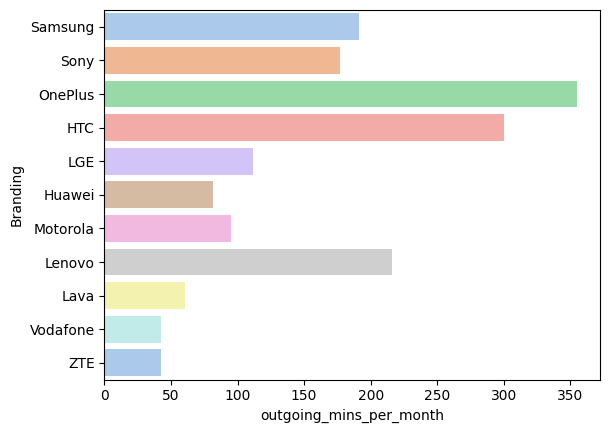

In [35]:
import numpy as np
sns.barplot(x='outgoing_mins_per_month',y='Branding',data=dfKetQua,errorbar=None, palette='pastel')

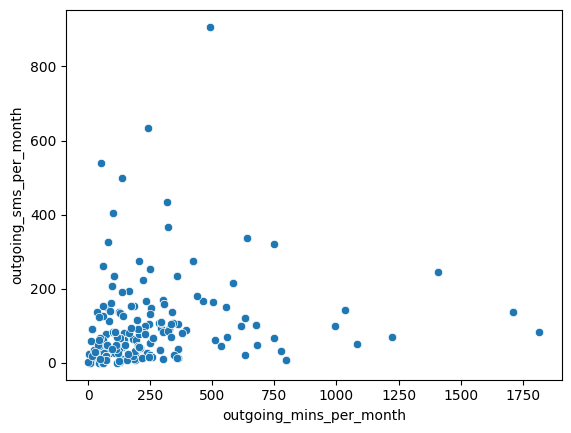

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân tán
sns.scatterplot(x='outgoing_mins_per_month', y='outgoing_sms_per_month', data=dfKetQua)

# Hiển thị biểu đồ
plt.show()

In [42]:
#câu 11
from statsmodels.stats.weightstats import ztest as ztest
ztest(dfKetQua['outgoing_mins_per_month'], value=200)
#=>không đủ dữ kiện để kết luận trung bình outgoing_mins_per_month bằng 200 phút

(np.float64(4.043062626787007), np.float64(5.275752162256692e-05))

In [43]:
#câu 12
from statsmodels.stats.weightstats import ztest as ztest
ztest(dfKetQua['outgoing_sms_per_month'], value=100)
#=>không đủ dữ kiện để kết luận trung bình outgoing_sms_per_month bằng 100 tin nhắn

(np.float64(-0.8657558154979389), np.float64(0.3866240841802139))

In [44]:
#câu 13
from statsmodels.stats.weightstats import ztest as ztest
ztest(dfKetQua['monthly_mb'], value=2048)
#=>không đủ dữ kiện để kết luận trung bình monthly_mb bằng 2048 mb

(np.float64(6.270337979876716), np.float64(3.602652473710358e-10))

In [45]:
#câu 14
dfKetQua[['outgoing_mins_per_month','outgoing_sms_per_month','monthly_mb']].corr()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
outgoing_mins_per_month,1.000000,0.108519,0.117056
outgoing_sms_per_month,0.108519,1.000000,-0.072870
monthly_mb,0.117056,-0.072870,1.000000


In [46]:
#câu 15
from scipy.stats.stats import pearsonr
pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])
#Kết luạn:không đủ dữ kiện để kết luận outgoing_mins_per_month và outgoing_sms_per_month có tương quan

C:\Users\thegi\AppData\Local\Temp\ipykernel_23820\412793303.py:2: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=np.float64(0.10851853963490199), pvalue=np.float64(0.06404245105516007))

In [52]:
#Câu 16
from scipy.stats import chi2_contingency
import scipy.stats as stats
crosdata = pd.crosstab(dfKetQua['platform'], [dfKetQua['Branding']], rownames=['platform'], colnames=['Branding'])
stat, p, dof, expected = chi2_contingency(crosdata)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
#Kết luận: không đủ dữ kiện để kết luận platform và Branding có mối quan hệ

p value is 1.0
Independent (H0 holds true)


In [55]:
#câu 17
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('monthly_mb ~ platform', data=dfKetQua).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
#Kết luận:không đủ dữ kiện để kết luận monthly và platform có mối quan hệ

,df,sum_sq,mean_sq,F,PR(>F)
platform,1.0,2.145811e+07,2.145811e+07,0.779453,0.378323
Residual,209.0,5.753705e+09,2.752969e+07,NaN,NaN


In [57]:
#câu 18
model = ols('monthly_mb ~ platform + Branding + platform: Branding',data=dfKetQua).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)
#Kết luận:Không đủ dữ kiện để monthly_mb và platform theo loại brading có quan hệ 

                      df        sum_sq       mean_sq         F    PR(>F)
platform             1.0  1.002565e+07  1.002565e+07  0.350017  0.554807
Branding            10.0  2.808772e+08  2.808772e+07  0.980601  0.461728
platform:Branding   10.0  1.213563e+09  1.213563e+08  4.236803  0.000025
Residual           190.0  5.442239e+09  2.864336e+07       NaN       NaN


In [58]:
#câu 19
import statsmodels.api as sm
X_with_constant = sm.add_constant(dfKetQua[["outgoing_mins_per_month"]].values)
y = dfKetQua[['outgoing_sms_per_month']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.456
Date:                Wed, 28 Aug 2024   Prob (F-statistic):             0.0640
Time:                        20:05:36   Log-Likelihood:                -1767.6
No. Observations:                 292   AIC:                             3539.
Df Residuals:                     290   BIC:                             3547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0916      8.330     10.095      0.0

In [62]:
#câu 20
import statsmodels.api as sm
X_with_constant = sm.add_constant(dfKetQua[["outgoing_mins_per_month"]].values)
y = dfKetQua[['outgoing_sms_per_month']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.456
Date:                Wed, 28 Aug 2024   Prob (F-statistic):             0.0640
Time:                        20:09:03   Log-Likelihood:                -1767.6
No. Observations:                 292   AIC:                             3539.
Df Residuals:                     290   BIC:                             3547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0916      8.330     10.095      0.0